Create the plots of the simulation using the correct color scale, ie, a color-vision deficiency (CVD; color blindness) friendly color map.

Here we just read the simulated data *__/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_8/Simulation_Data__*, and plot it.

The results, and how we generate this data are explained in the above paste.

We plot the results using the Analysis.ipynb file, in *__/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_8/Analysis__* folder.

In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import numpy as np

# Import CMasher to register colormaps
import cmasher as cmr
cmap = cmr.pride
import matplotlib.pyplot as plt

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_8/Simulation_Data/"

In [2]:
#Reading inputs of the Vrms map
x, y, vrms, erms              = np.loadtxt(data_folder+"vrms_data.txt", unpack=True)      #vrms data

#Reading Image Data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/image.fits",
        noise_map_path=f"{data_folder}/noise_map.fits",
        psf_path=f"{data_folder}/psf.fits",
        pixel_scales=0.1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/new_mask.fits", hdu=1, 
                                    pixel_scales=imaging.pixel_scales)

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)     #Masked image

source = al.Array.from_fits(
    file_path=f"{data_folder}/Souce_galaxy.fits", pixel_scales=0.1,
)

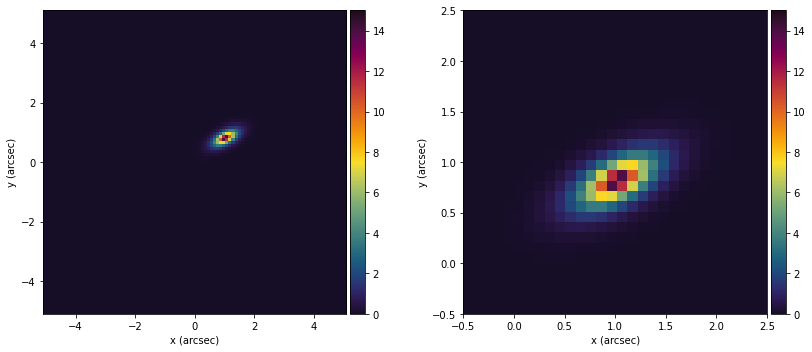

In [12]:
#Ploting the original source galaxy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
real_x=np.array([-5,5])
real_y=np.array([-5,5])

dx = 0.1
dy = 0.1
extent = [real_x[0]-dx, real_x[-1]+dx, real_y[0]-dy, real_y[-1]+dy]

fig1 = ax1.imshow(source.reshape(100,100), cmap=cmap,extent=extent, vmin=0, vmax=15,)
plt.colorbar(fig1, ax=ax1, pad=0.01)
ax1.set_xlabel("x (arcsec)")
ax1.set_ylabel("y (arcsec)")


fig2 = ax2.imshow(source.reshape(100,100), cmap=cmap,extent=extent, vmin=0, vmax=15,)
plt.colorbar(fig2, pad=0.01)
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,2.5)
ax2.set_xlabel("x (arcsec)")
ax2.set_ylabel("y (arcsec)")


plt.tight_layout()

Text(0, 0.5, 'y (arcsec)')

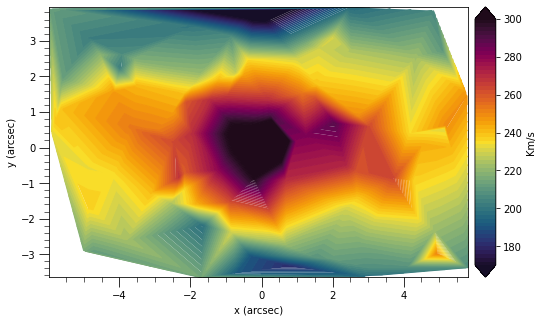

In [13]:
#Vrms Data
from plotbin.plot_velfield import plot_velfield
plt.figure(figsize=(8,5))
plot_velfield(x=x*0.2, y=y*0.2, vel=vrms, colorbar=True,label='Km/s', cmap=cmap, nodots=True, vmin=170, vmax=300)
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

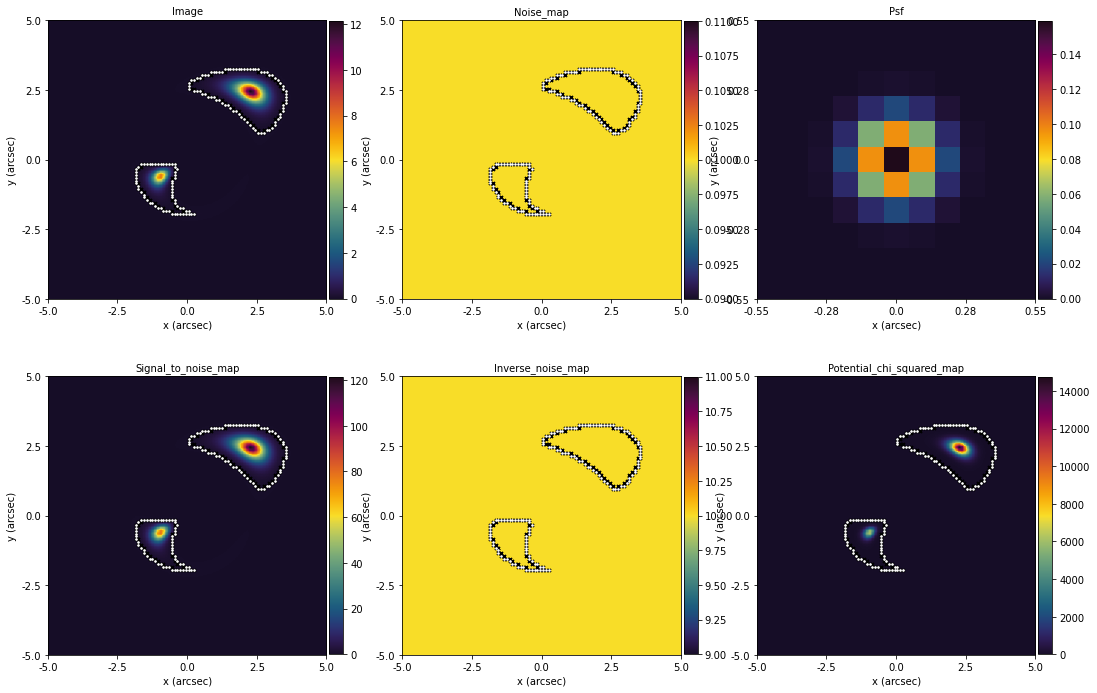

In [112]:
#Lens data
aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask, include=aplt.Include(border=True),
    sub_plotter=aplt.SubPlotter(cmap=aplt.ColorMap(cmap=cmap))                        #Plot
)